In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# https://github.com/EvidenceN/multi-fruit-classification/blob/master/fruit_model.ipynb
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras_preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

Using TensorFlow backend.


In [4]:
training_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/drive/My Drive/Fruits Image Classification/Training_smaller"
train_gen = training_datagen.flow_from_directory(train_dir, 
                                    target_size=(150, 150), 
                                    class_mode="categorical") 

Found 4838 images belonging to 10 classes.


In [5]:
val_dir = "/content/drive/My Drive/Fruits Image Classification/Test_smaller"
val_gen = validation_datagen.flow_from_directory(val_dir,
                                    target_size=(150, 150),
                                    class_mode="categorical")

Found 1623 images belonging to 10 classes.


In [6]:
# apple directory
train_apple_dir = "/content/drive/My Drive/Fruits Image Classification/Training_smaller/Apple Red 1"

number_apples_train = len(os.listdir(train_apple_dir))
print("total training apple images:", number_apples_train)

#banana directory
train_banana_dir = "/content/drive/My Drive/Fruits Image Classification/Training_smaller/Banana"

# printing the number of bananas in train dataset
number_banana_train = len(os.listdir(train_banana_dir))
print("total training banana images:", number_banana_train)

total training apple images: 492
total training banana images: 490


In [7]:
apple_names = os.listdir(train_apple_dir)
apple_names[:10]
banana_names = os.listdir(train_banana_dir)
banana_names[:10]

['48_100.jpg',
 '220_100.jpg',
 '234_100.jpg',
 '120_100.jpg',
 '91_100.jpg',
 '69_100.jpg',
 'r_185_100.jpg',
 '325_100.jpg',
 'r_126_100.jpg',
 'r_179_100.jpg']

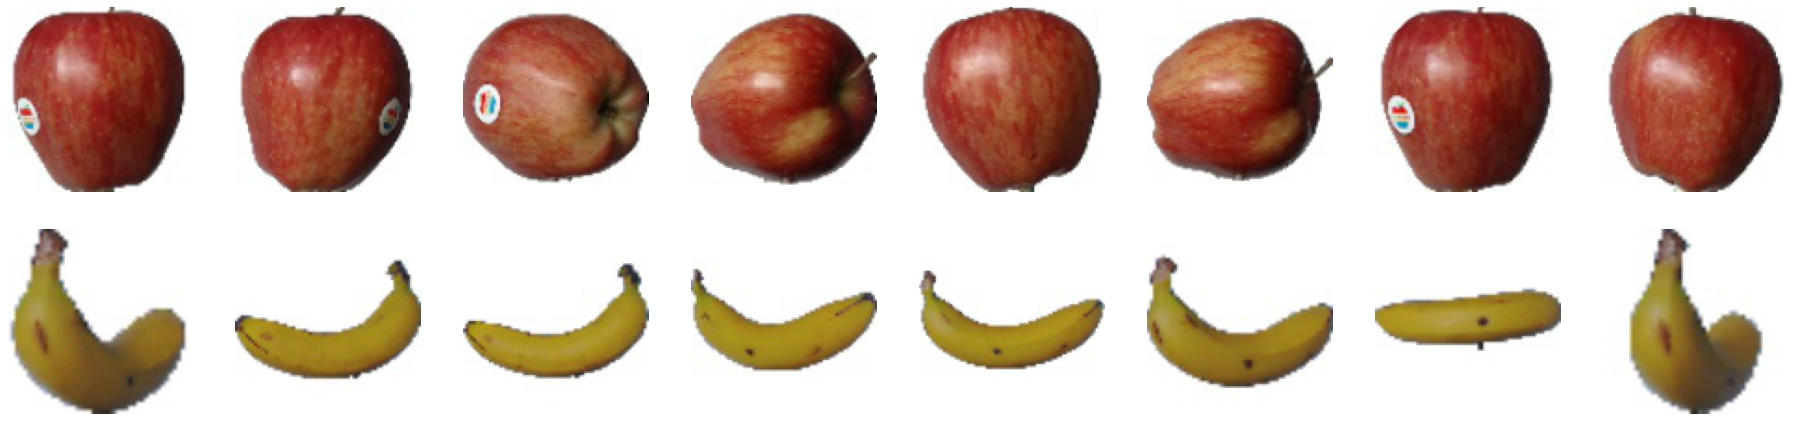

In [8]:
# objective is to print images to get a preview. 

# parameters for the graph. The images will be in a 4x4 configuration
nrows = 8
ncols = 8

pic_index = 0 #index for iterating over images

#set up matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

apple_pic = [os.path.join(train_apple_dir, fname) for fname in apple_names[pic_index-8:pic_index]]
banana_pic = [os.path.join(train_banana_dir, fname) for fname in banana_names[pic_index-8:pic_index]]

for i, img_path in enumerate(apple_pic + banana_pic):

    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("Off")
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [9]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten before feeding into Dense neural network. 
    tf.keras.layers.Flatten(),
    # 512 neurons in the hidden layer
    tf.keras.layers.Dense(512, activation="relu"),
    # 15 = 15 different categories
    # softmas takes a set of values and effectively picks the biggest one. for example if the output layer has
    # [0.1,0.1,0.5,0.2,0.1], it will take it and turn it into [0,0,1,0,0]
    tf.keras.layers.Dense(10, activation="softmax")
]);

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
# implementing a callback function to terminate training once training reaches 98% accuracy for validation data

validation_accuracy = 0.98

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_acc") >= validation_accuracy):
            print("\nReached desired validation accuracy, so cancelling training")
            self.model.stop_training=True
            
callbacks = myCallback()

In [12]:
model.compile(loss = "categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [13]:
fruit_model = model.fit(train_gen, batch_size = 75 , epochs=20, validation_data=val_gen)

Epoch 1/20
152/152 [==============================] - 1974s 13s/step - loss: 0.8487 - accuracy: 0.7656 - val_loss: 0.0278 - val_accuracy: 0.9975
Epoch 2/20
152/152 [==============================] - 12s 80ms/step - loss: 0.1172 - accuracy: 0.9800 - val_loss: 5.1281e-05 - val_accuracy: 1.0000
Epoch 3/20
152/152 [==============================] - 12s 80ms/step - loss: 0.2143 - accuracy: 0.9750 - val_loss: 0.0134 - val_accuracy: 0.9945
Epoch 4/20
152/152 [==============================] - 12s 78ms/step - loss: 0.4702 - accuracy: 0.9806 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/20
152/152 [==============================] - 12s 82ms/step - loss: 0.1446 - accuracy: 0.9876 - val_loss: 4.9153e-04 - val_accuracy: 1.0000
Epoch 6/20
152/152 [==============================] - 13s 85ms/step - loss: 0.1451 - accuracy: 0.9907 - val_loss: 4.2945e-04 - val_accuracy: 1.0000
Epoch 7/20
152/152 [==============================] - 13s 85ms/step - loss: 0.2099 - accuracy: 0.9878 - val_loss: 3.6906e-0

In [14]:
filepath = "/content/drive/My Drive/Fruits Image Classification"
tf.keras.models.save_model(
    model,
    filepath,
    overwrite=True,
    include_optimizer=True,
    save_format="tf",
    signatures=None
)

model.save("/content/drive/My Drive/Fruits Image Classification/fruit_new_final_tkinter.h5")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Fruits Image Classification/assets


In [15]:
fruit_model.history['accuracy']

[0.765605628490448,
 0.9799503684043884,
 0.974989652633667,
 0.9805704951286316,
 0.987598180770874,
 0.9906986355781555,
 0.9878048896789551,
 1.0,
 0.9919388294219971,
 1.0,
 0.9954526424407959,
 0.9944191575050354,
 1.0,
 0.995659351348877,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

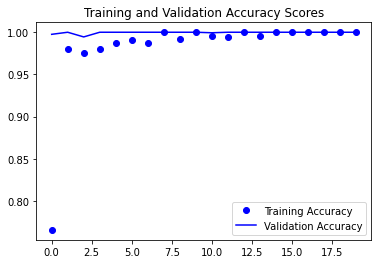

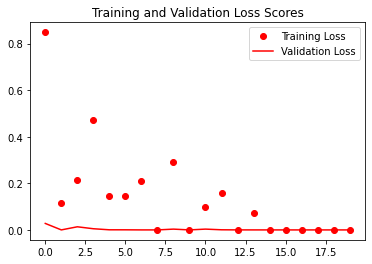

In [16]:
# graphin loss function and accuracy scores of the fruit model 

acc = fruit_model.history['accuracy'] #training accuracy scores from the model that has been trained
val_acc = fruit_model.history['val_accuracy'] #validation accuracy scores from the model that has been trained
loss = fruit_model.history['loss'] #training loss scores from the model that has been trained
val_loss = fruit_model.history['val_loss'] #validation loss scores from the model that has been trained

epochs = range(len(acc)) #x axis

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy Scores')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss Scores')

plt.legend()

plt.show()

In [17]:
entries = os.listdir("/content/drive/My Drive/Fruits Image Classification/Test_smaller")
dir = sorted(entries)
d = []
for j in dir:
  d.append(j)

d

['Apple Red 1',
 'Banana',
 'Beetroot',
 'Guava',
 'Lychee',
 'Orange',
 'Pear',
 'Pineapple',
 'Pomegranate',
 'Watermelon']

Saving 125_100.jpg to 125_100.jpg
(array([9]),)
The fruit is: Watermelon


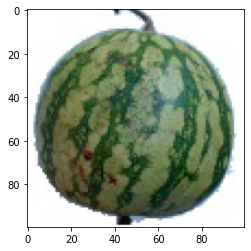

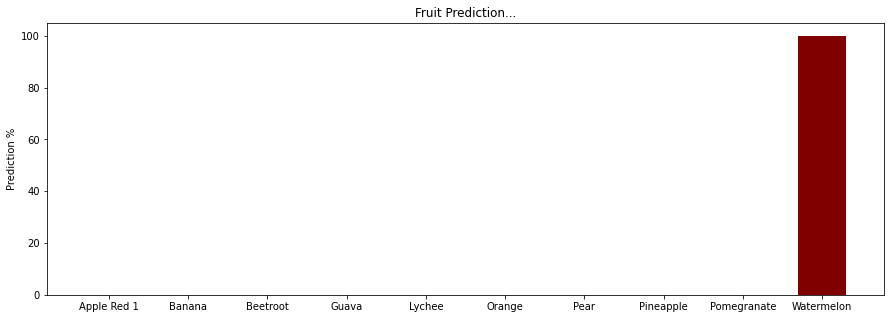

In [22]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  pic = Image.open(path)
  img = image.load_img(path, target_size = (150, 150))
  array = image.img_to_array(img)
  x = np.expand_dims(array, axis=0)

  vimage = np.vstack([x])
  res = model.predict(vimage)
  # res1 = model.predict_proba(vimage)

result = np.where(res[0] == 1)
print(result)
print("The fruit is: "+d[result[0][0]])

img = mpimg.imread(path)
plt.imshow(img)
    
plt.show()

# Print in the form of Bar chart...
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

y_pos = np.arange(len(d))
fig = plt.figure(figsize = (15, 5))
plt.bar(d, res[0]*100, color = 'maroon', width = 0.6)

plt.xticks(y_pos, d)
plt.ylabel('Prediction %')
plt.title('Fruit Prediction...')

plt.show()

In [12]:
# Create a cool GUI with the help of tkinter

In [11]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from keras_preprocessing import image
import numpy
import tensorflow as tf
import numpy as np

d = ['Apple Red 1',
 'Banana',
 'Beetroot',
 'Guava',
 'Lychee',
 'Orange',
 'Pear',
 'Pineapple',
 'Pomegranate',
 'Watermelon']

from keras.models import load_model
model = tf.keras.models.load_model('fruit_new_final_tkinter.h5')


#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Fruit Image Classifier...')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    
    img = image.load_img(file_path, target_size = (150, 150))
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)
    vimage = np.vstack([x])
    pred = model.predict(vimage)
    
    result = np.where(pred[0] == 1)
    print(result)
    print("The fruit is: "+d[result[0][0]])

    sign = d[result[0][0]]
    label.configure(foreground='#011638', text="The given fruit is: " + sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,
  padx=10,pady=5)
upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Fruit Image Classifier...",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

(array([1], dtype=int64),)
The fruit is: Banana
(array([1], dtype=int64),)
The fruit is: Banana
(array([1], dtype=int64),)
The fruit is: Banana
(array([1], dtype=int64),)
The fruit is: Banana
(array([9], dtype=int64),)
The fruit is: Watermelon
(array([9], dtype=int64),)
The fruit is: Watermelon
(array([5], dtype=int64),)
The fruit is: Orange
